# LSTM

#### 1. Import Dependancies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
%matplotlib inline

#### 2. Explore Dataset

In [2]:
# Load your data
data = pd.read_csv('../data/BTC-USD.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-21,234.016006,236.242004,233.835007,235.343994,235.343994,15108900
1,2015-05-22,235.320999,240.968994,235.059998,240.348007,240.348007,27003000
2,2015-05-23,240.285995,241.024994,238.690994,238.871994,238.871994,14605000
3,2015-05-24,238.975998,241.977997,238.811005,240.953003,240.953003,11508000
4,2015-05-25,240.927002,241.020996,236.636993,237.110001,237.110001,14423900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3289 non-null   object 
 1   Open       3289 non-null   float64
 2   High       3289 non-null   float64
 3   Low        3289 non-null   float64
 4   Close      3289 non-null   float64
 5   Adj Close  3289 non-null   float64
 6   Volume     3289 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 180.0+ KB


In [5]:
close_prices = data['Close'].values
close_prices

array([  235.343994,   240.348007,   238.871994, ..., 66278.367188,
       71448.195313, 71124.765625])

#### 3. Data Standardization

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = scaler.fit_transform(close_prices.reshape(-1, 1))

#### 4. Create Sequences

In [7]:
# Function to create sequences
def create_sequences(data, seq_len):
    x = []
    y = []
    for i in range(len(data) - seq_len):
        x.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(x), np.array(y)

seq_len = 50  # Number of past days to use for prediction
X, y = create_sequences(close_prices, seq_len)

#### 5. Train Test Split

In [8]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2591, 50, 1)
y_train shape: (2591, 1)
X_test shape: (648, 50, 1)
y_test shape: (648, 1)


#### 6. Build Model

In [9]:
# Build the LSTM model
model = Sequential([
    LSTM(200, activation='leaky_relu', return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(200, activation='leaky_relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

E:\PROJECTS - AI\dl-bitcoin-price-prediction\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482,601 (1.84 MB)

 Trainable params: 482,601 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

#### 7. Train Model

In [10]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [11]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - loss: 0.0116 - val_loss: 0.0021
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 8.0908e-04 - val_loss: 0.0030
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 6.1515e-04 - val_loss: 0.0019
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 4.7625e-04 - val_loss: 0.0017
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 2.9709e-04 - val_loss: 0.0012
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 4.2313e-04 - val_loss: 8.2249e-04
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 3.1204e-04 - val_loss: 5.5967e-04
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 2.5843e-04 - val_loss: 5.1898e-04
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 1.8061e-04 - val_loss: 4.8729e-04
Epoch 10/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - loss: 2.3786e-04 - val_loss: 9.4263e-04
Epoch 11/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/st

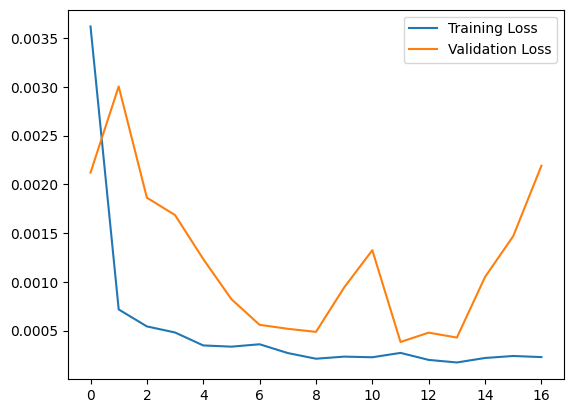

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#### 6. Evaluate Model

In [13]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.3898e-04
Test Loss: 0.0002779165515676141


In [14]:
# Make predictions
y_pred = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [15]:
# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

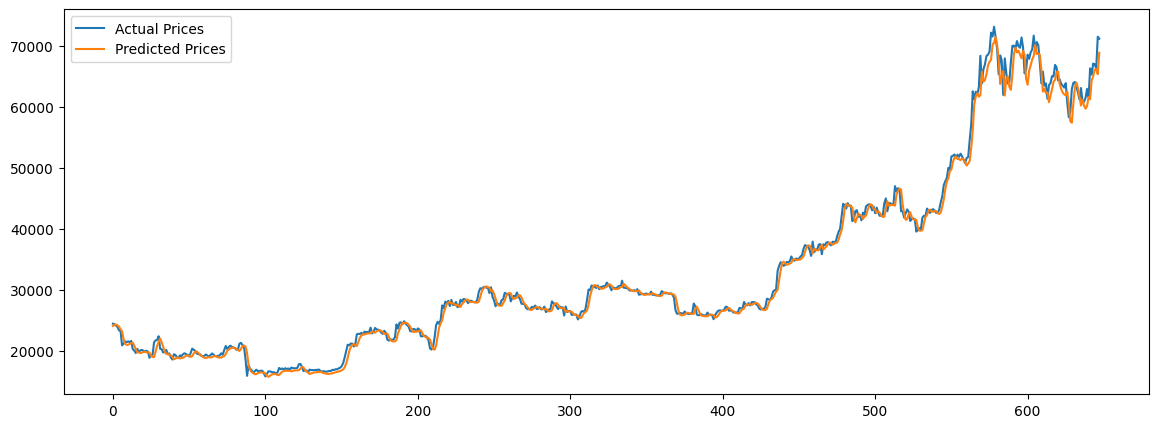

In [16]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.show()

In [32]:
# Initialize a variable to store the last 50 days' data
last_50_days = X_test[-1]

# Initialize an empty list to store the predicted prices
predicted_prices = []

# Predict the next 15 days' prices
for _ in range(15):
    # Reshape the last_50_days to match the input shape of the model
    input_data = last_50_days.reshape(1, seq_len, 1)
    
    # Use the model to predict the next day's price
    next_day_pred = model.predict(input_data)[0][0]
    
    # Append the predicted price to the list
    predicted_prices.append(next_day_pred)
    
    # Update last_50_days by removing the first element and appending the predicted price
    last_50_days = np.append(last_50_days[1:], next_day_pred)

# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
